In [1]:
import library.putil as putil
import numpy as np
from numpy.random import multivariate_normal as mvnrand
import matplotlib.pyplot as plt

def kgauss (params = (2.0, 1.0)):

    # H0 = 1
    [sigma, l] = params
    # (7.10)
    return lambda x,y: (sigma**2) * np.exp (-(x - y)**2 / (2 * (l**2)))

def kernel_matrix (xx, kernel):
    N = len(xx)
    eta = 1e-6

    # Return K
    # small offset for stability
    return np.array (
        [kernel (xi, xj) for xi in xx for xj in xx]
    ).reshape(N,N) + eta * np.eye(N)

#def fgp (xx, kernel):
#    N = len(xx)
#    K = kernel_matrix (xx, kernel)
#    return mvnrand (np.zeros(N), K)

def fgpGetK(xx, kernel):
    K = kernel_matrix (xx, kernel)

    return K



Text(0.5, 1.0, 'Mu')

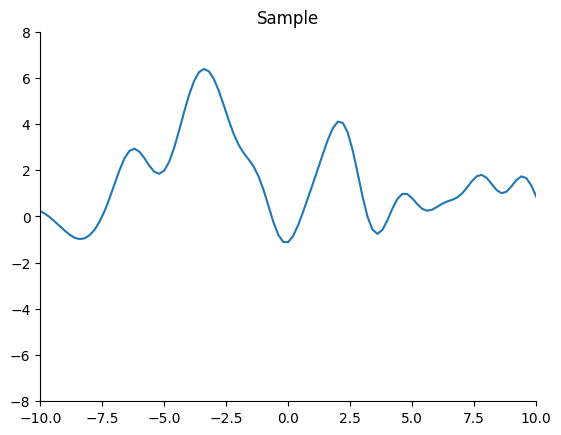

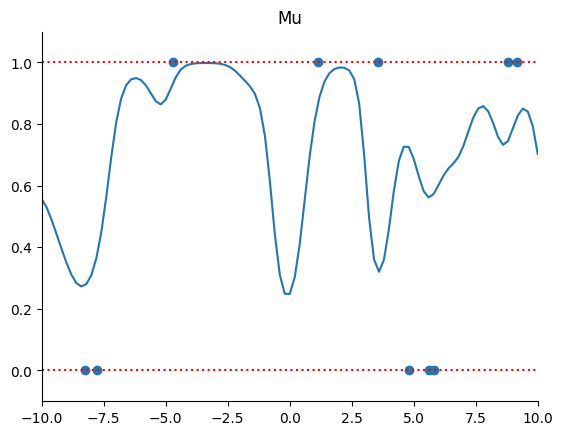

In [2]:
# Sample data points here

xmin = -10.0
xmax = 10.0
N = 101

SAMPLE_NUM = 10
SAMPLE_XMIN = xmin
SAMPLE_XMAX = xmax

ymin = -8
ymax = 8

muPlotMin = -0.1
muPlotMax = 1.1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sampleFromBernoulli(mu):
    x = np.random.rand(len(mu))
    mu = np.array(mu)

    return [1 if xtmp < m else 0 for xtmp, m in zip(x, mu)]

# xs for plot
xx = np.linspace (xmin, xmax, N)

# Select xs for samples
sampleXs = np.random.rand(SAMPLE_NUM) * (SAMPLE_XMAX - SAMPLE_XMIN) + SAMPLE_XMIN

xsAll = np.concatenate([xx, sampleXs])
kAll = fgpGetK(xsAll, kgauss((2.5, 1.0)))

# Sample data
ysAll = mvnrand (np.zeros(len(xsAll)), kAll)
yy = ysAll[0 : len(xx)]
sampleYs = ysAll[len(xx) : ]

mus = sigmoid(yy)

bernoulliYs = sampleFromBernoulli(sigmoid(sampleYs))

# Plot data
fig = plt.figure()
ax = fig.add_subplot()

plt.plot (xx, yy)

putil.simpleaxis ()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_title("Sample")

fig = plt.figure()

ax = fig.add_subplot()

plt.plot (xx, mus)
plt.scatter(sampleXs, bernoulliYs)
plt.hlines([0, 1], xmin, xmax,color="red", linestyle = "dotted")

putil.simpleaxis ()

ax.set_xlim(xmin, xmax)
ax.set_ylim(muPlotMin, muPlotMax)
ax.set_title("Mu")
